In [1]:
using StateSpaceDynamics, Plots


In [2]:
model = initialize_slds()

SwitchingLinearDynamicalSystem([0.96 0.04; 0.04 0.96], StateSpaceDynamics.LinearDynamicalSystem[StateSpaceDynamics.LinearDynamicalSystem{StateSpaceDynamics.GaussianStateModel{Float64}, StateSpaceDynamics.GaussianObservationModel{Float64}}(StateSpaceDynamics.GaussianStateModel{Float64}([0.9452539570141245 -0.09484174581448675; 0.09484174581448675 0.9452539570141245], [0.001 0.0; 0.0 0.001], [0.0, 0.0], [0.001 0.0; 0.0 0.001]), StateSpaceDynamics.GaussianObservationModel{Float64}([-0.31498797116895605 0.4338858743048611; -0.31125240132442067 -0.3954398407537453; … ; -0.8253345499750688 -0.9654904870197227; 0.840288523245819 0.9656607495563969], [0.001 0.0 … 0.0 0.0; 0.0 0.001 … 0.0 0.0; … ; 0.0 0.0 … 0.001 0.0; 0.0 0.0 … 0.0 0.001]), 2, 10, Bool[1, 1, 1, 1, 1, 1]), StateSpaceDynamics.LinearDynamicalSystem{StateSpaceDynamics.GaussianStateModel{Float64}, StateSpaceDynamics.GaussianObservationModel{Float64}}(StateSpaceDynamics.GaussianStateModel{Float64}([-0.39533949471978524 -0.86383255548

In [3]:
T = 1000
# Generate synthetic data
x, y, z = sample(model, T)


([-0.005774135480555194 0.0020675904922135436 … 0.032159415587346474 0.05372887375999916; -0.017762773388346566 0.054760456040334735 … -0.10696223889695364 -0.09699464732560406], [-0.008165093772717243 0.045631950197704704 … -0.050323491624458885 -0.014473504581514515; 0.01744928312424765 -0.02060159033120583 … 0.0675583423786563 0.00388597355675159; … ; 0.005329651249859693 0.1451787980075594 … 0.03213684839745746 -0.03051328424403746; -0.029226275954721277 -0.024055213658275062 … -0.08508079724902803 -0.016188887912414893], [2, 2, 2, 2, 2, 2, 2, 2, 2, 1  …  1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

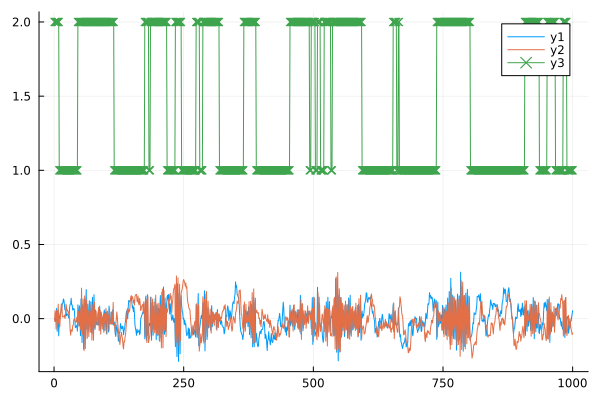

In [4]:
plot(x')
plot!(z, marker=:x)

In [5]:
using LinearAlgebra

p = model.B[1].obs_dim
d = model.B[1].latent_dim

K = model.K
A = [0.7 0.3; 0.2 0.8]
A ./= sum(A, dims=2) # Normalize rows to sum to 1

πₖ = rand(K)
πₖ ./= sum(πₖ) # Normalize to sum to 1

Q = Matrix(0.001 * I(d))

x0 = [0.0; 0.0]
P0 = Matrix(0.001 * I(d))

# set up the observation parameters
C = randn(p, d)
R = Matrix(0.001 * I(p))

B = [StateSpaceDynamics.LinearDynamicalSystem(
    StateSpaceDynamics.GaussianStateModel(0.95 * [cos(f) -sin(f); sin(f) cos(f)], Q, x0, P0),
    StateSpaceDynamics.GaussianObservationModel(C, R),
    d, p, fill(true, 6)) for (i,f) in zip(1:K, [0.7, 0.1])]

modeli = SwitchingLinearDynamicalSystem(A, B, πₖ, model.K)

SwitchingLinearDynamicalSystem([0.7 0.3; 0.2 0.8], StateSpaceDynamics.LinearDynamicalSystem[StateSpaceDynamics.LinearDynamicalSystem{StateSpaceDynamics.GaussianStateModel{Float64}, StateSpaceDynamics.GaussianObservationModel{Float64}}(StateSpaceDynamics.GaussianStateModel{Float64}([0.726600077920264 -0.6120068028758064; 0.6120068028758064 0.726600077920264], [0.001 0.0; 0.0 0.001], [0.0, 0.0], [0.001 0.0; 0.0 0.001]), StateSpaceDynamics.GaussianObservationModel{Float64}([1.0548426197090242 -0.5314211023224301; -0.6474332415107721 0.1271760215776717; … ; -0.6187600545042322 0.04491788725458301; 0.75661587672164 0.16538516227614086], [0.001 0.0 … 0.0 0.0; 0.0 0.001 … 0.0 0.0; … ; 0.0 0.0 … 0.001 0.0; 0.0 0.0 … 0.0 0.001]), 2, 10, Bool[1, 1, 1, 1, 1, 1]), StateSpaceDynamics.LinearDynamicalSystem{StateSpaceDynamics.GaussianStateModel{Float64}, StateSpaceDynamics.GaussianObservationModel{Float64}}(StateSpaceDynamics.GaussianStateModel{Float64}([0.9452539570141245 -0.09484174581448675; 0.094

In [6]:
FB = StateSpaceDynamics.initialize_forward_backward(modeli, T)
FS = [StateSpaceDynamics.initialize_FilterSmooth(modeli.B[k], T) for k in 1:K]

ml, mls = variational_expectation!(modeli, y, FB, FS)  

(-150213.9257396446, Any[-156968.40078876688, -151840.07432849996, -150503.65755683975, -150219.07537477897, -150215.07511638885, -150214.52540974488, -150214.34596410755, -150214.14980658412, -150213.99248404137, -150213.93735838588, -150213.92730599944, -150213.9259375325, -150213.92576436134, -150213.92574269068, -150213.925739983, -150213.9257396446])

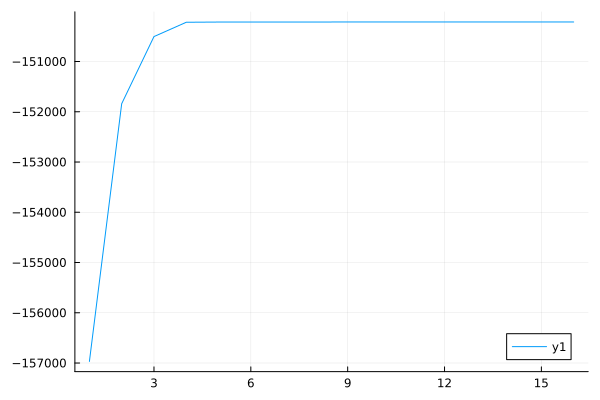

In [7]:
plot(mls)

In [8]:
mls, param_diff, FB, FS = fit!(modeli, y; max_iter=100)

Fitting SLDS via vEM... 100%|██████████████████████████████████████████████████| Time: 0:00:37 ( 0.38  s/it)


([-150189.1038627922, 3781.390905400641, 4073.75702171813, 4171.354728152527, 4242.8427165976345, 4319.781880470659, 4385.299306641891, 4443.637742915628, 4495.221905973928, 4539.419824065473  …  NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN], [19.543802387805293, 2.547667936187077, 0.6634057224148402, 0.4754645153682928, 0.3593503729035105, 0.29149597396363863, 0.24772646476768664, 0.21568935225023045, 0.19138160954186115, 0.172420692687674  …  0.059051877185325265, 0.0585203503566755, 0.05799475349688045, 0.05747501376336105, 0.05696105956754908, 0.05645282052939803, 0.05595022743316523, 0.05545321218374361, 0.05496170776446722, 0.054475648195964246], StateSpaceDynamics.ForwardBackward{Float64}([-4.581663343902047 -4.959881692021633 … -308.0872657966927 -299.16681735097796; -13.184091487940064 -15.598060450396634 … -8.196497342302958 -8.058532129625311], [-4.581663343902047 -9.6176687456309 … -5500.14301037598 -5499.43527921574; -Inf -22.792939712766294 … -5196.138849121165 -5204.

In [34]:
diff(mls)[1:35]

35-element Vector{Float64}:
 153970.49476819285
    292.3661163174893
     97.59770643439697
     71.48798844510748
     76.93916387302488
     65.51742617123182
     58.33843627373699
     51.584163058299964
     44.197918091545034
     33.737572277609615
      ⋮
      9.24734404114588
      8.908423634894461
      8.59853580620711
      8.314226471256916
      8.052622835174589
      7.811278361031327
      7.5880691242273315
    NaN
    NaN

In [10]:
model.A

2×2 Matrix{Float64}:
 0.96  0.04
 0.04  0.96

In [11]:
modeli.A

2×2 Matrix{Float64}:
 0.926702   0.0732984
 0.0160891  0.983911

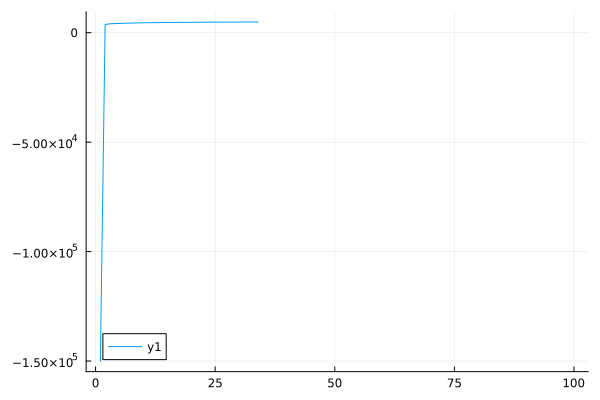

In [12]:
plot(mls)

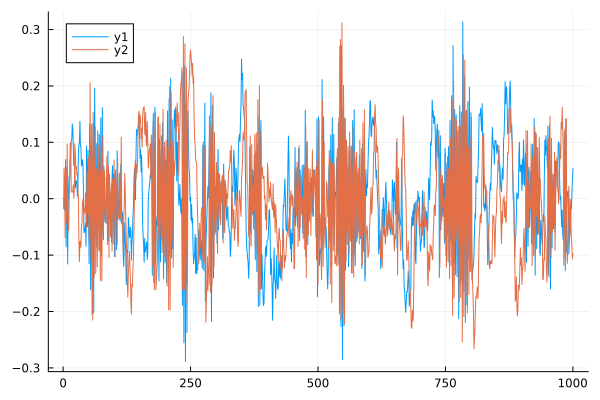

In [13]:
plot(x')


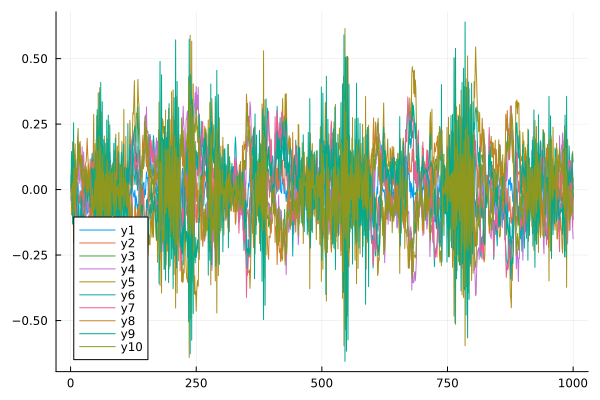

In [14]:
plot(y')

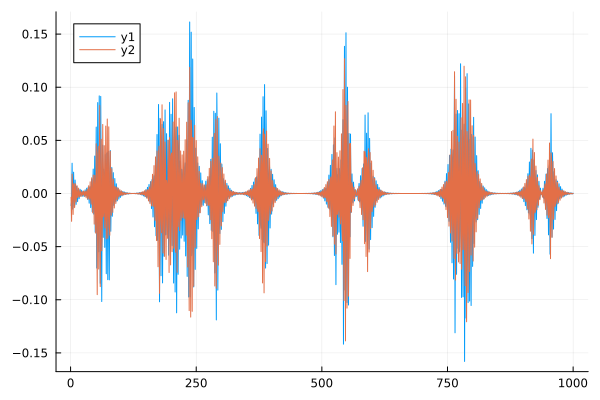

In [15]:
plot(FS[1].x_smooth')

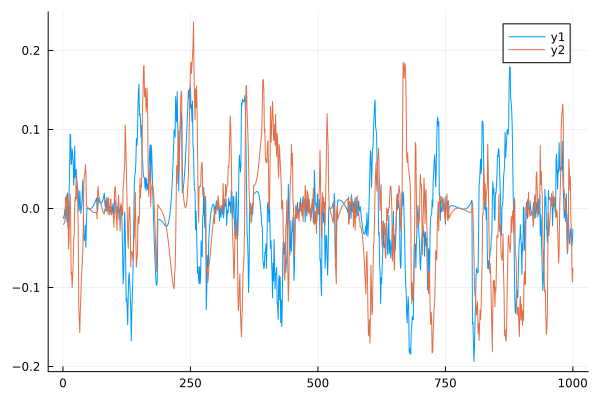

In [16]:
plot(FS[2].x_smooth')

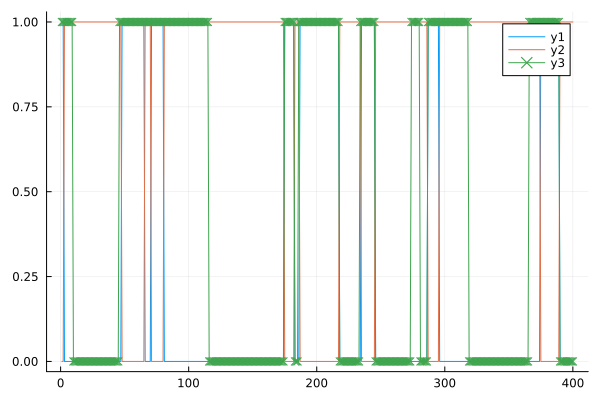

In [17]:
plot(exp.(FB.γ[:,1:400])')
plot!(z[1:400] .- 1, marker=:x)

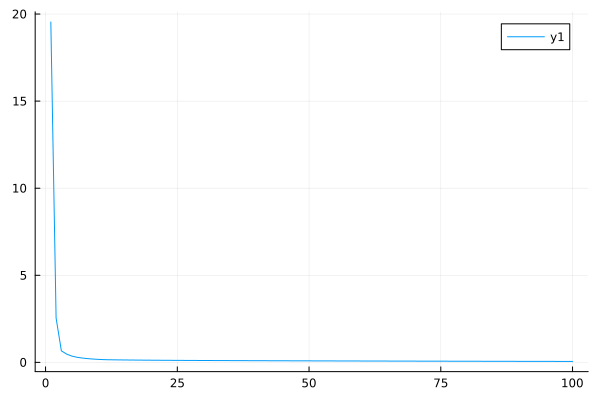

In [18]:
plot(param_diff)

In [19]:
y1 = model.B[1].obs_model.C * FS[1].x_smooth
y2 = model.B[2].obs_model.C * FS[2].x_smooth

10×1000 Matrix{Float64}:
 -0.0158049   -0.0154812   -0.0149402   …  -0.0561814  -0.0763306  -0.0635002
  0.00674563   0.00763681   0.00821867      0.0225087   0.0407425   0.0368905
  0.0257795    0.0226551    0.0197226       0.0953457   0.103911    0.0788866
 -0.00672348  -0.00746854  -0.00793543     -0.0226392  -0.039473   -0.0354077
  0.0212423    0.0227783    0.0236076       0.0726947   0.118225    0.10409
 -0.0173794   -0.0166317   -0.0157275   …  -0.0623375  -0.0808278  -0.0661013
  0.00458624   0.0053181    0.00581315      0.0151234   0.0286992   0.026279
  0.0129319    0.0137952    0.0142433       0.0443578   0.0714033   0.0626851
 -0.0190208   -0.0211474   -0.0224831      -0.0640196  -0.111819   -0.100348
  0.0225217    0.0191812    0.0161369       0.0841693   0.0859339   0.0631081

In [20]:
y_combined = y1 .+ y2

10×1000 Matrix{Float64}:
 -0.0137699   -0.0245452    …  -0.0560534  -0.0763556  -0.0635828
  0.0116704    0.0202806        0.022417    0.0409524   0.036811
  0.0147019    0.00312234       0.0954485   0.103508    0.0790963
 -0.0172419   -0.04889         -0.0222761  -0.0400341  -0.0352883
  0.036871     0.0727327        0.0722897   0.118968    0.103872
 -0.00208066  -0.0158708    …  -0.0621752  -0.0804768  -0.0664821
  0.0231886    0.0183128        0.0151806   0.0292203   0.025858
 -0.00312386   0.000908716      0.0443278   0.0709405   0.0630427
 -0.00625571   0.0102023       -0.0642407  -0.111286   -0.100559
  0.00958663  -0.0122824        0.0843898   0.0853962   0.0633228

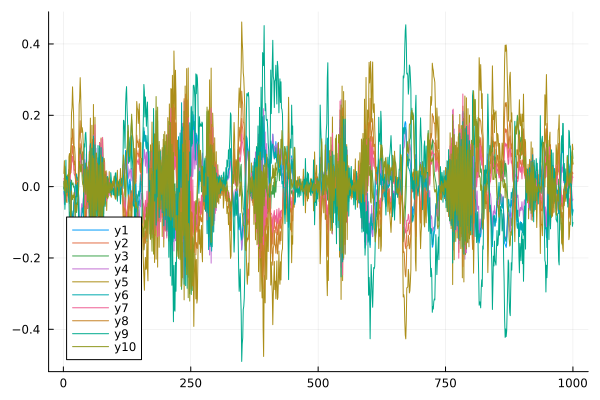

In [21]:
plot(y_combined')